# Title of the project 2: “Diabetes Patients”

## About Dataset

## This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. 

## Several constraints were placed on the selection of these instances   from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv('diabetes_MeriSKILL.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## No null values in the data set as we can see above

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Finding Outliers and performing outlier treatment

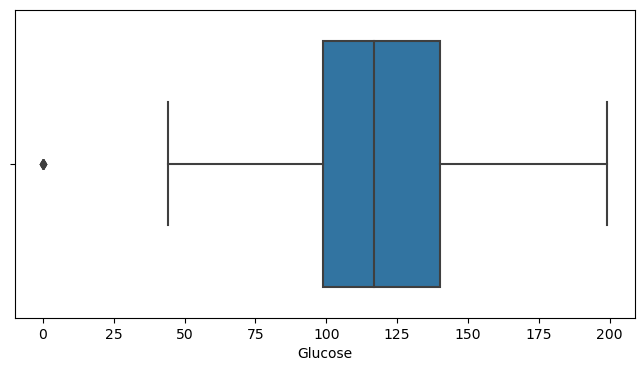

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(df.Glucose);

In [53]:
q1=df['Glucose'].describe()['25%']
q3=df['Glucose'].describe()['75%']
iqr=q3-q1
lower_bound=q1-1.5*iqr
df['Glucose']=np.where(df['Glucose']<lower_bound, lower_bound, df['Glucose'])

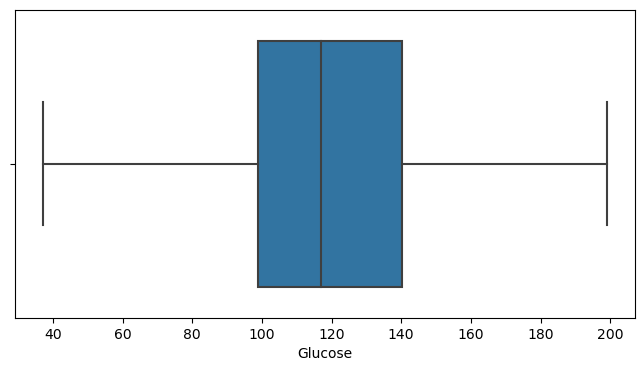

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(df.Glucose);

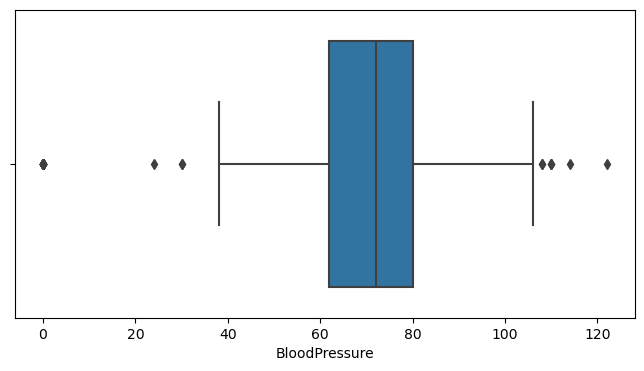

In [55]:
plt.figure(figsize=(8,4))
sns.boxplot(df.BloodPressure);

In [56]:
q1=df['BloodPressure'].describe()['25%']
q3=df['BloodPressure'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
df['BloodPressure']=np.where(df['BloodPressure']>upper_bound, upper_bound, df['BloodPressure'])
df['BloodPressure']=np.where(df['BloodPressure']<lower_bound, lower_bound, df['BloodPressure'])

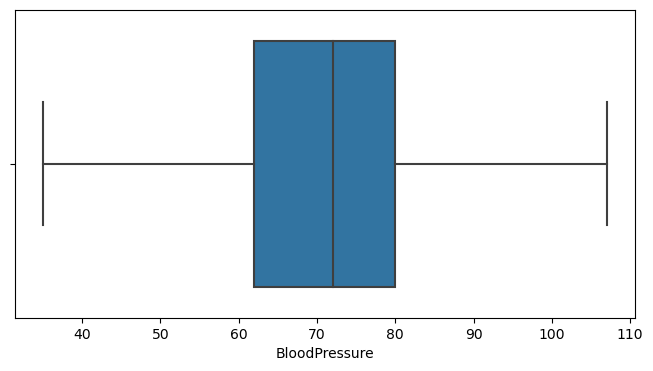

In [57]:
plt.figure(figsize=(8,4))
sns.boxplot(df.BloodPressure);

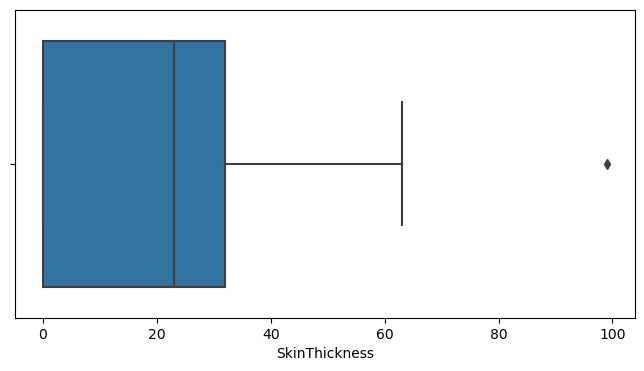

In [58]:
plt.figure(figsize=(8,4))
sns.boxplot(df.SkinThickness);

In [59]:
q1=df['SkinThickness'].describe()['25%']
q3=df['SkinThickness'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['SkinThickness']=np.where(df['SkinThickness']>upper_bound, upper_bound, df['SkinThickness'])

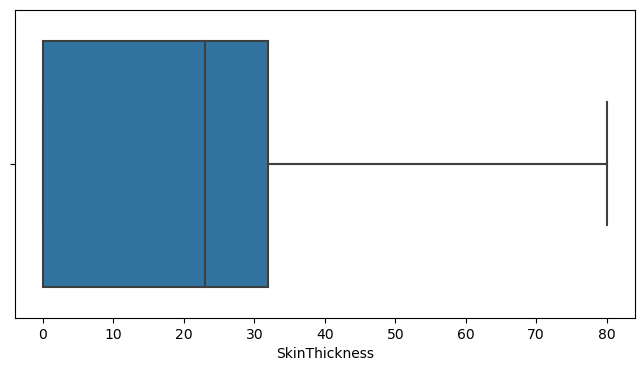

In [60]:
plt.figure(figsize=(8,4))
sns.boxplot(df.SkinThickness);

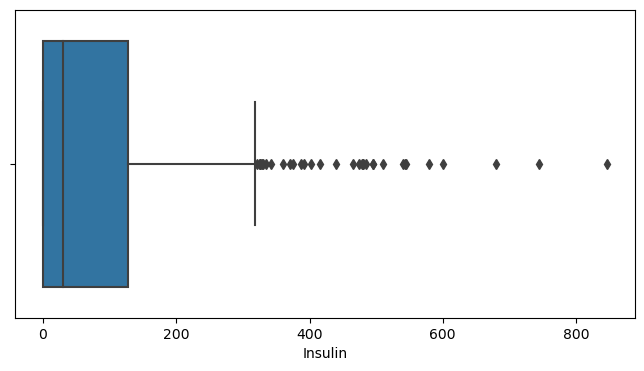

In [61]:
plt.figure(figsize=(8,4))
sns.boxplot(df.Insulin);

In [62]:
q1=df['Insulin'].describe()['25%']
q3=df['Insulin'].describe()['75%']
iqr=q3-q1
upper_bound=q3+1.5*iqr
df['Insulin']=np.where(df['Insulin']>upper_bound, upper_bound, df['Insulin'])

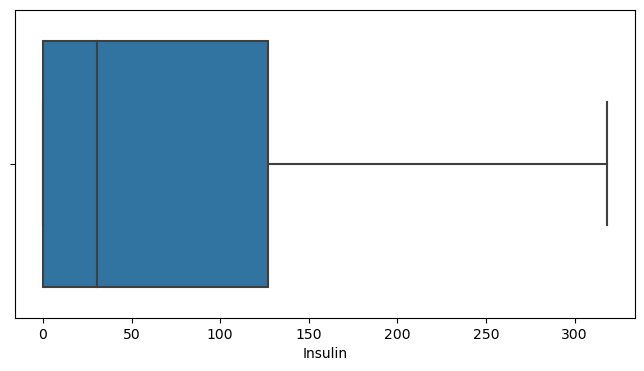

In [63]:
plt.figure(figsize=(8,4))
sns.boxplot(df.Insulin);

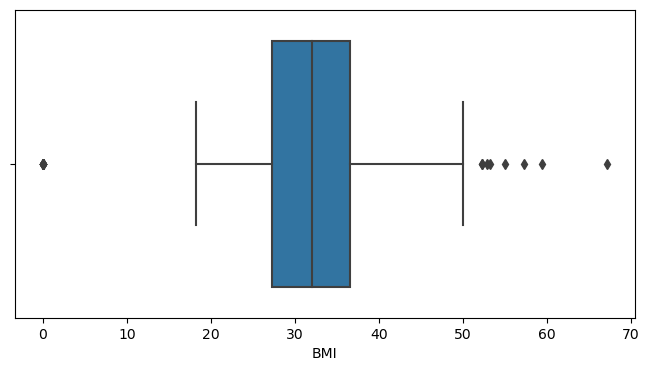

In [64]:
plt.figure(figsize=(8,4))
sns.boxplot(df.BMI);

In [65]:
q1=df['BMI'].describe()['25%']
q3=df['BMI'].describe()['75%']
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['BMI']=np.where(df['BMI']<lower_bound, lower_bound, df['BMI'])
df['BMI']=np.where(df['BMI']>upper_bound, upper_bound, df['BMI'])

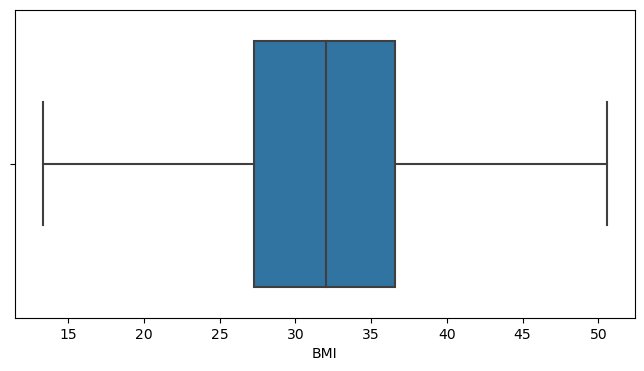

In [66]:
plt.figure(figsize=(8,4))
sns.boxplot(df.BMI);

## Univariant Analysis

## Analysis of BMI

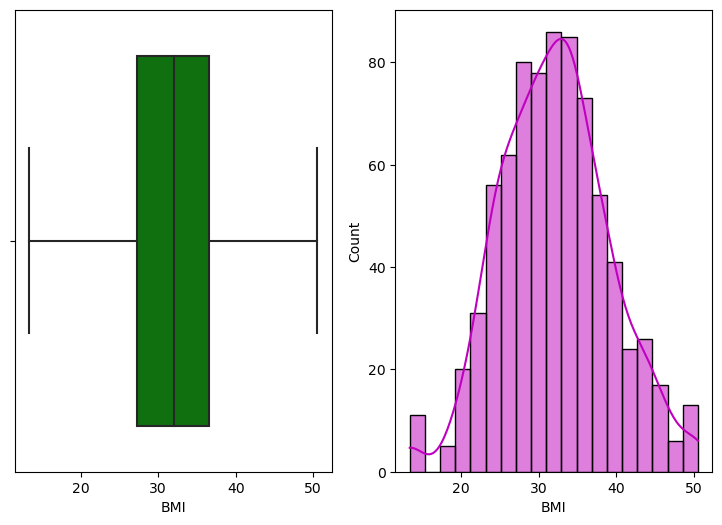

In [67]:
fig, ax = plt.subplots(1, 2, figsize= (9,6))              
sns.histplot(x = df["BMI"], kde=True, ax =ax[1], color = "m") 
sns.boxplot(x = df["BMI"], ax = ax[0], color = "g")
plt.show()

## Analysis of Outcome

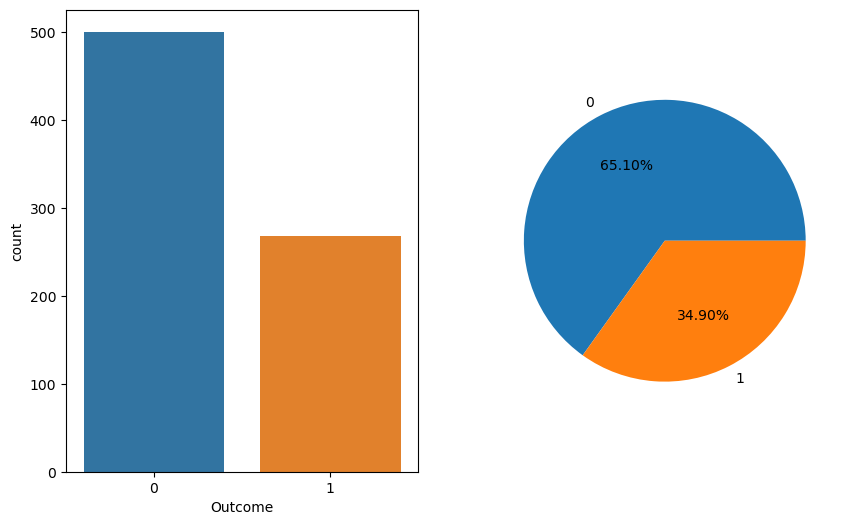

In [68]:
fig,ax=plt.subplots(1,2, figsize=(10,6))
percentage=df['Outcome'].value_counts()
labels=list(df['Outcome'].value_counts().index)

sns.countplot(x=df['Outcome'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct='%0.2f%%')

plt.show()

## From we above graphs we can see that 65.10% do not have diabetes      and 34.90% are having diabetes.

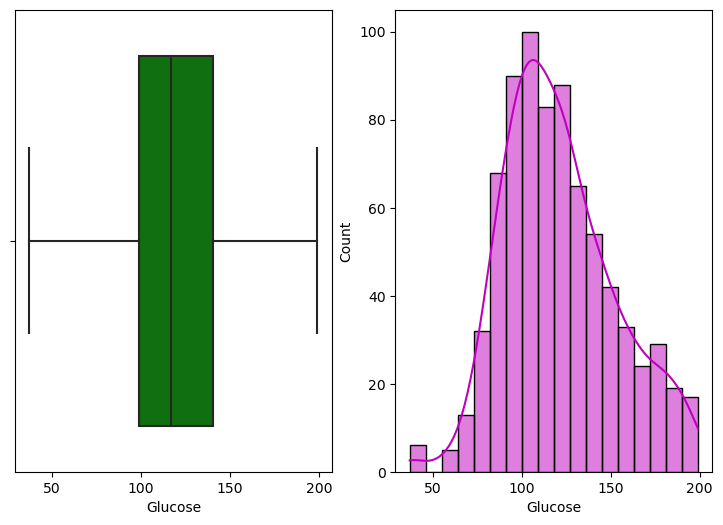

In [69]:
fig, ax = plt.subplots(1, 2, figsize= (9,6))              
sns.histplot(x = df["Glucose"], kde=True, ax =ax[1], color = "m") 
sns.boxplot(x = df["Glucose"], ax = ax[0], color = "g")
plt.show()

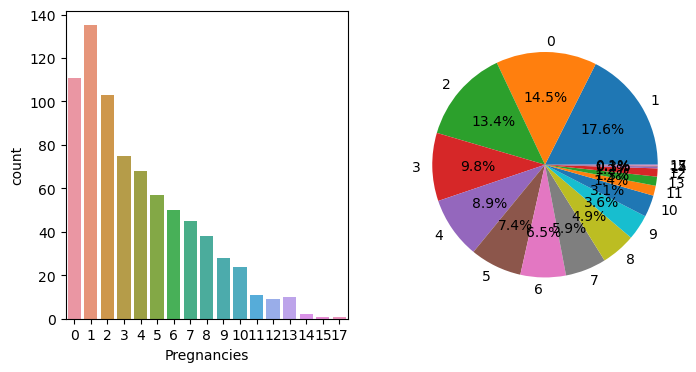

In [70]:
fig, ax=plt.subplots(1,2, figsize=(8,4))

percentage=df['Pregnancies'].value_counts()
labels=list(df['Pregnancies'].value_counts().index)

sns.countplot(x=df['Pregnancies'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%1.1f%%")

plt.show()

## Bivariant Analysis

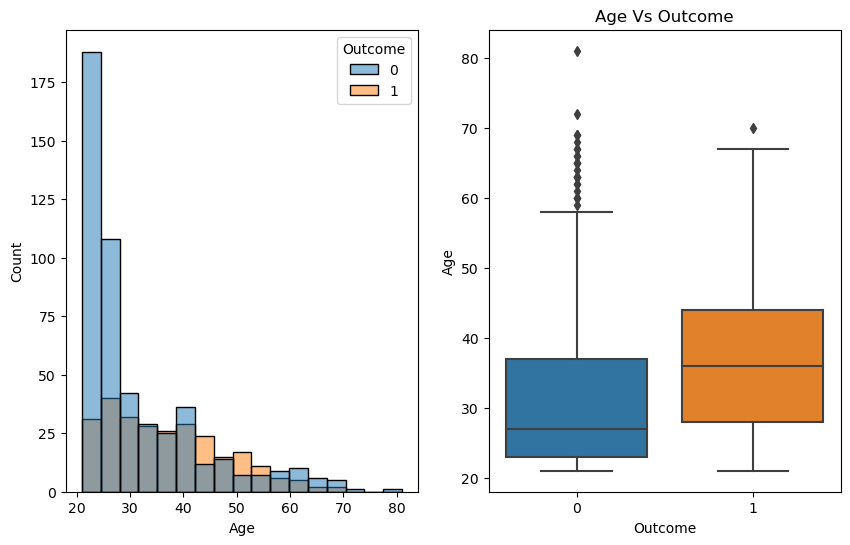

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))
sns.histplot(x = df["Age"], hue = df["Outcome"], ax = ax[0])
sns.boxplot(x = df["Outcome"] ,y = df["Age"] , ax = ax[1])
plt.title('Age Vs Outcome')
plt.show()

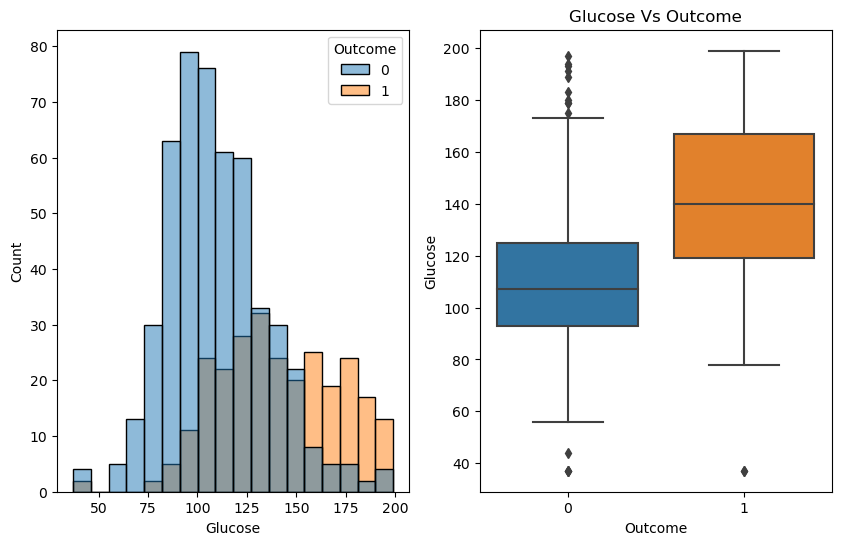

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))
sns.histplot(x = df["Glucose"], hue = df["Outcome"], ax = ax[0])
sns.boxplot(x = df["Outcome"] ,y = df["Glucose"] , ax = ax[1])
plt.title('Glucose Vs Outcome')
plt.show()

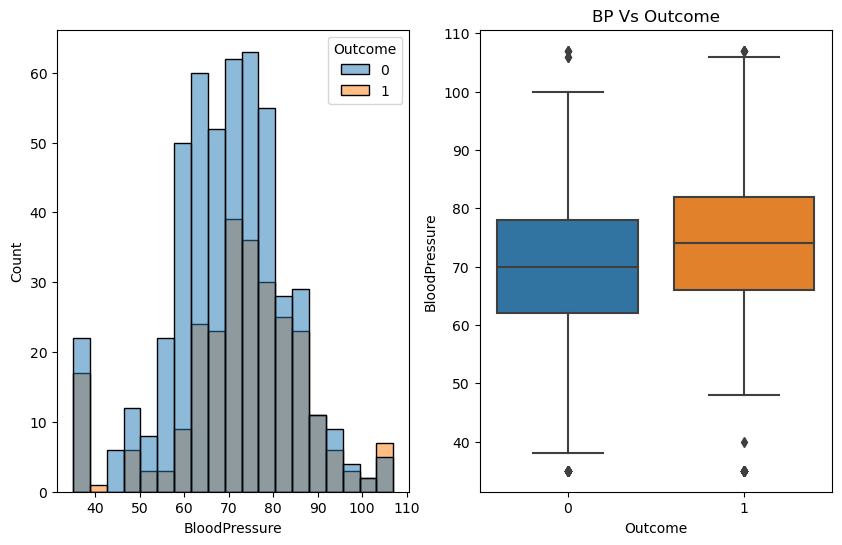

In [73]:
fig, ax=plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=df['BloodPressure'], hue=df['Outcome'], ax=ax[0])
sns.boxplot(x=df['Outcome'], y=df['BloodPressure'], ax=ax[1])
plt.title('BP Vs Outcome')
plt.show()

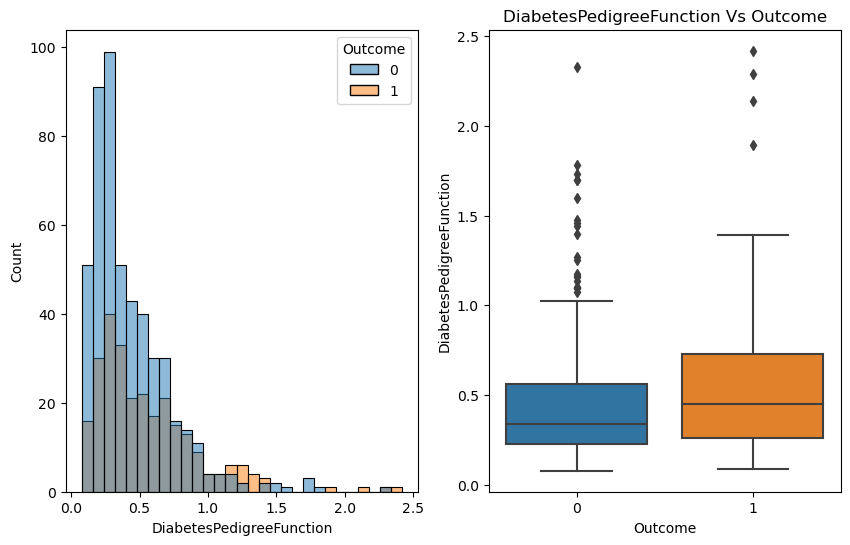

In [74]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=df['DiabetesPedigreeFunction'], hue=df['Outcome'], ax=ax[0])
sns.boxplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'], ax=ax[1])
plt.title('DiabetesPedigreeFunction Vs Outcome')
plt.show()
             

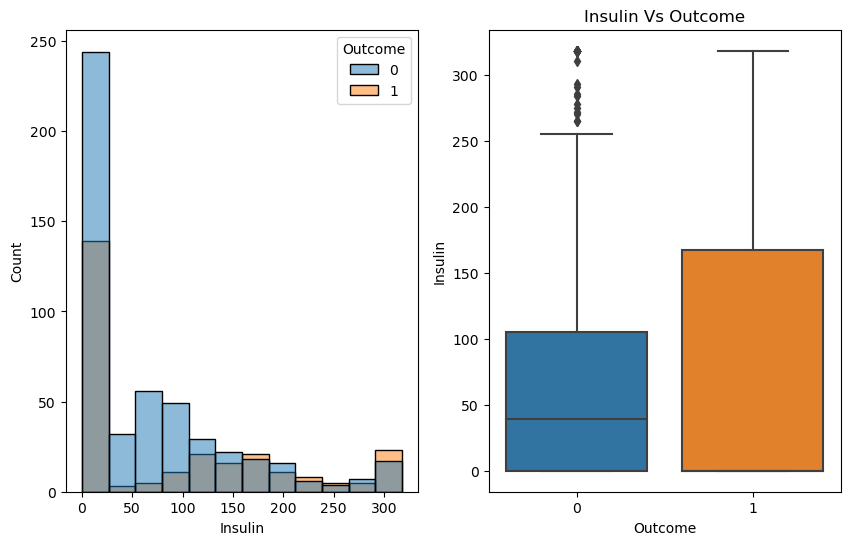

In [75]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=df['Insulin'], hue=df['Outcome'], ax=ax[0])
sns.boxplot(x=df['Outcome'], y=df['Insulin'], ax=ax[1])
plt.title('Insulin Vs Outcome')
plt.show()

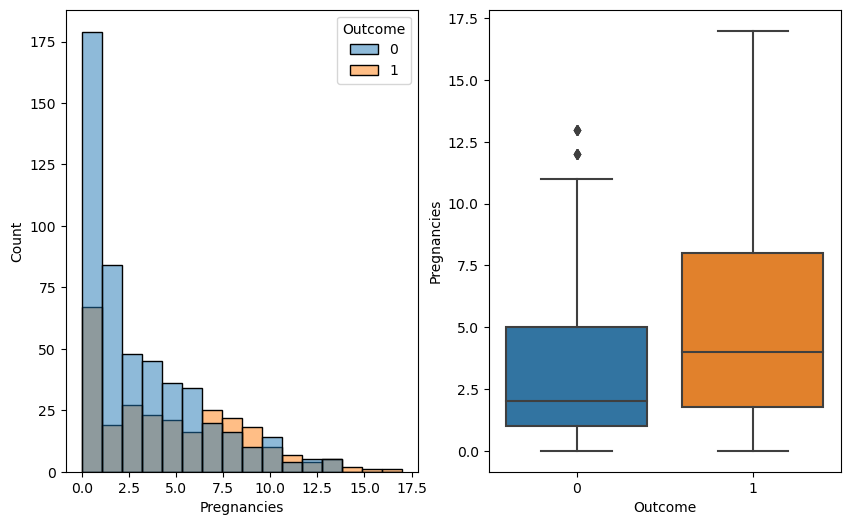

In [76]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.histplot(x=df['Pregnancies'], hue=df['Outcome'], ax=ax[0])
sns.boxplot(x=df['Outcome'], y=df['Pregnancies'], ax=ax[1])
plt.show()

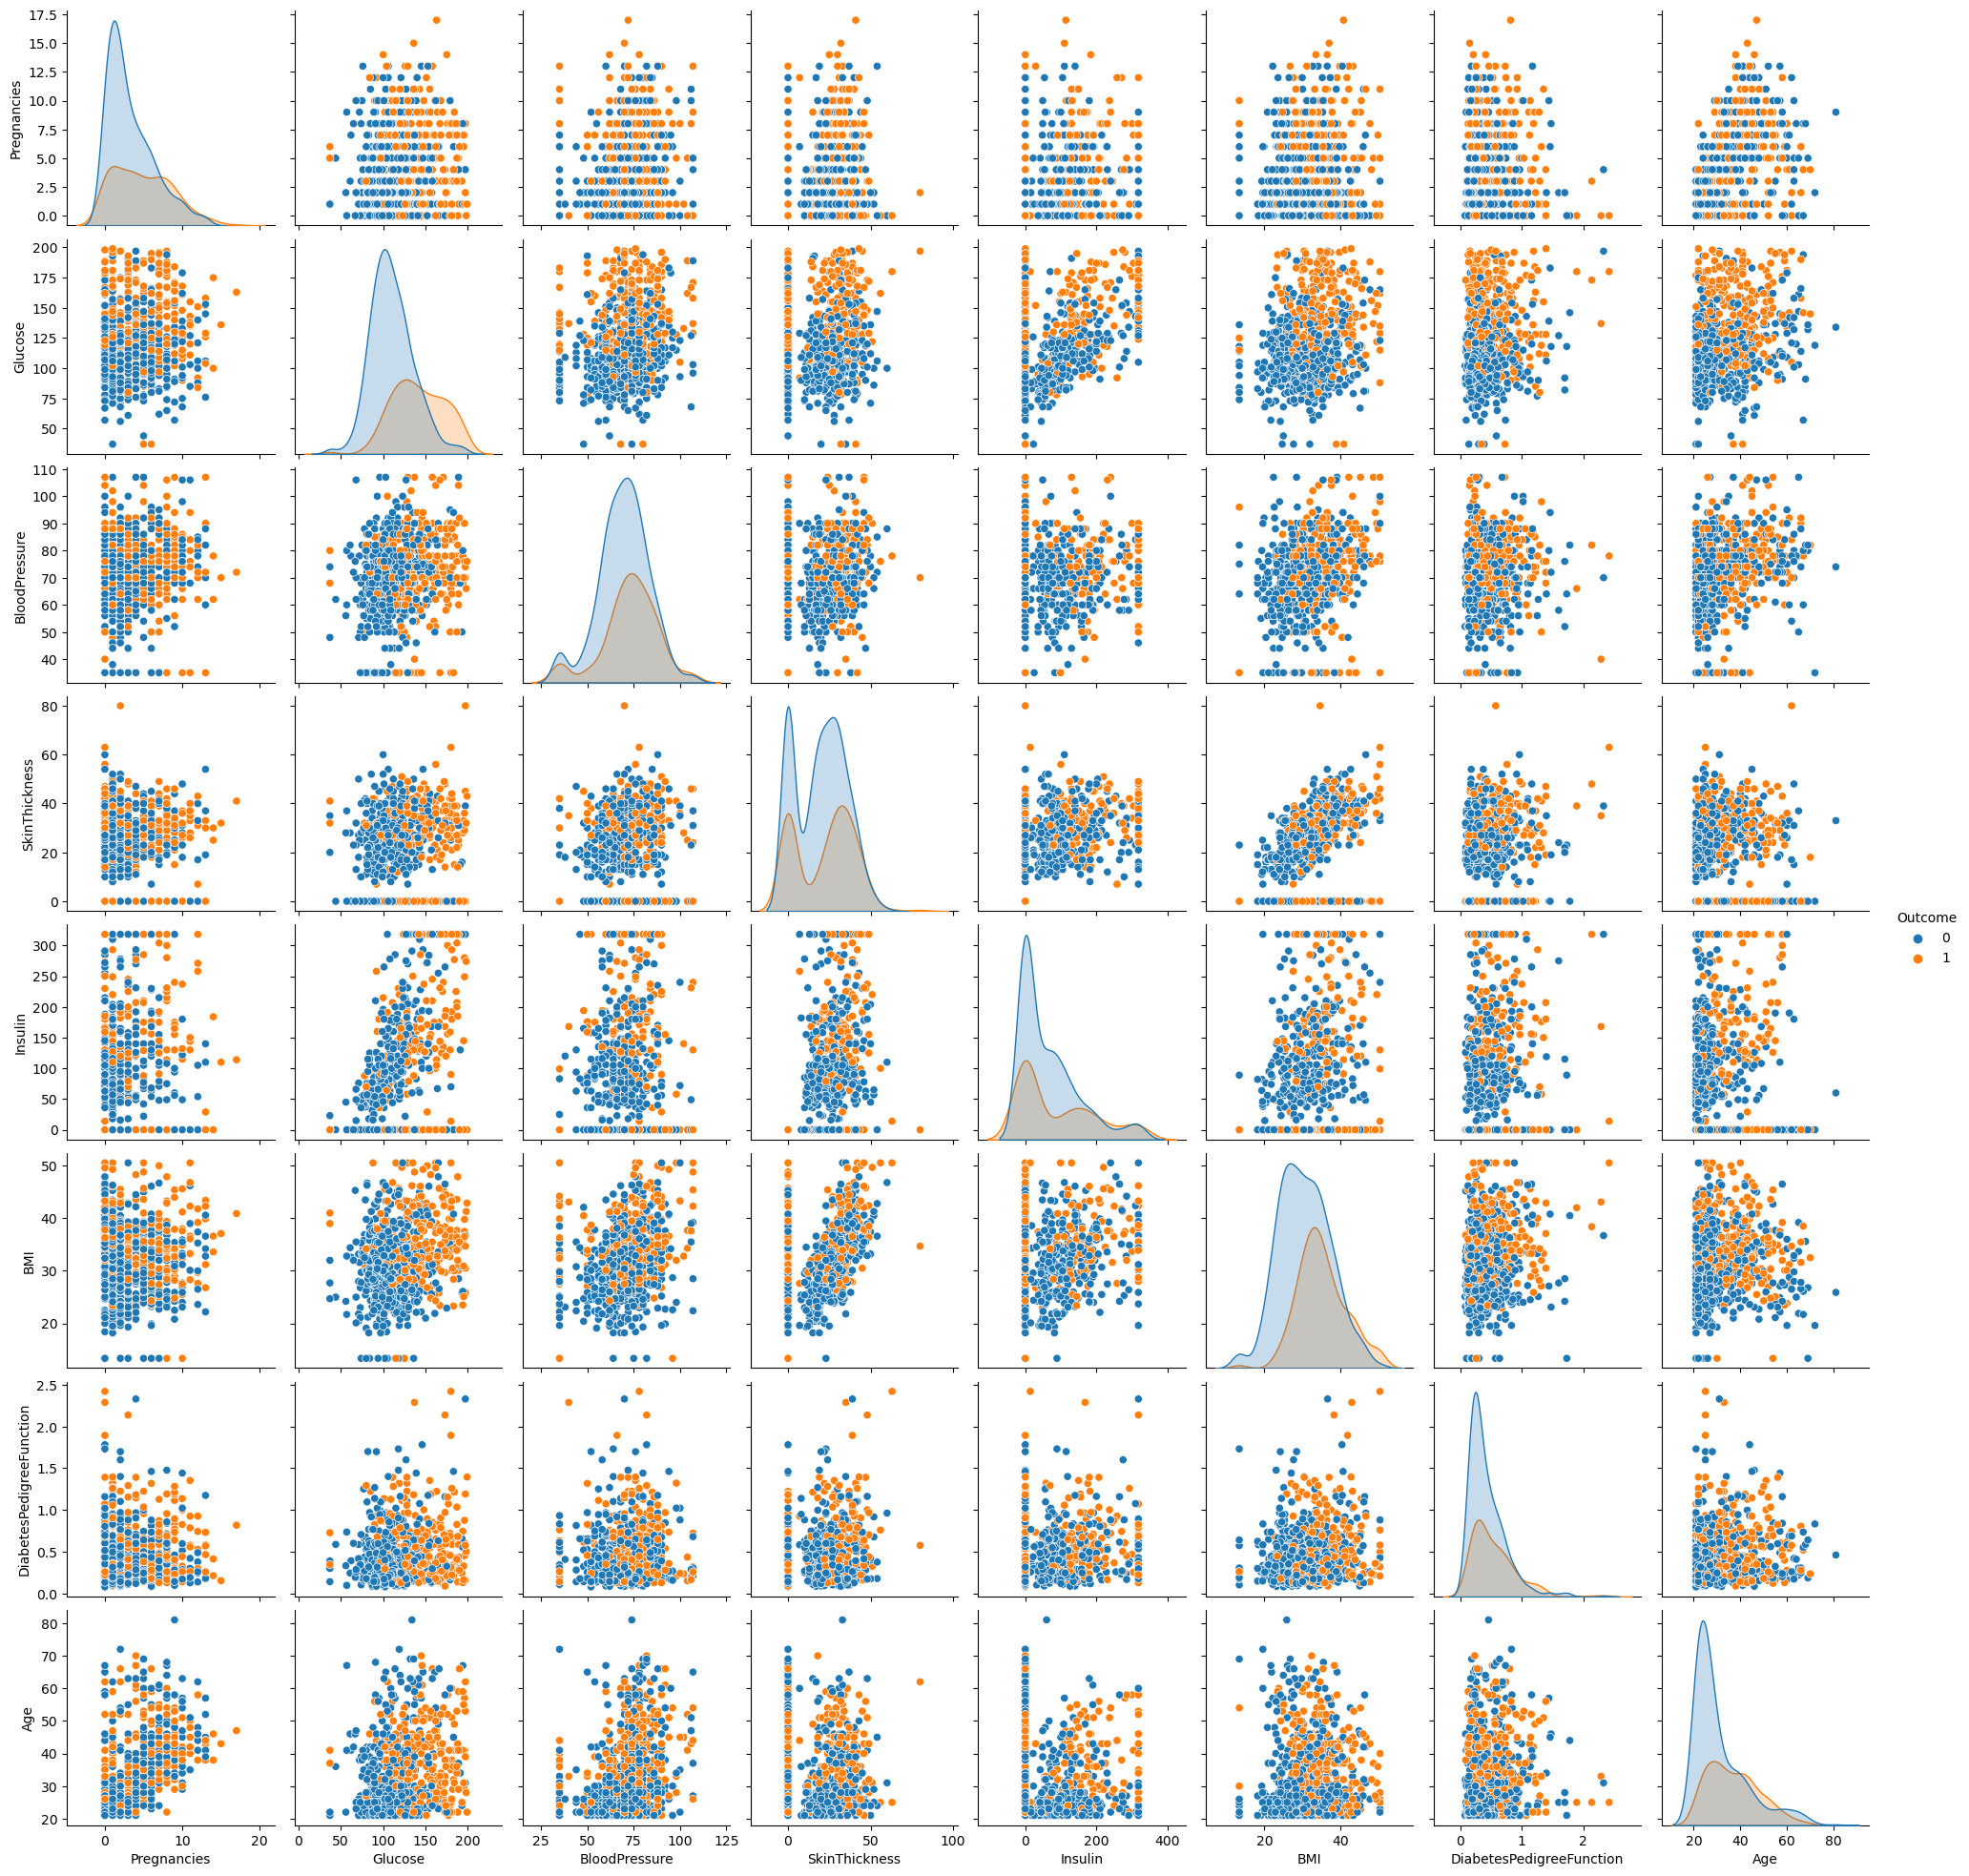

In [77]:
sns.pairplot(df, hue='Outcome');

## Correlation Matrix

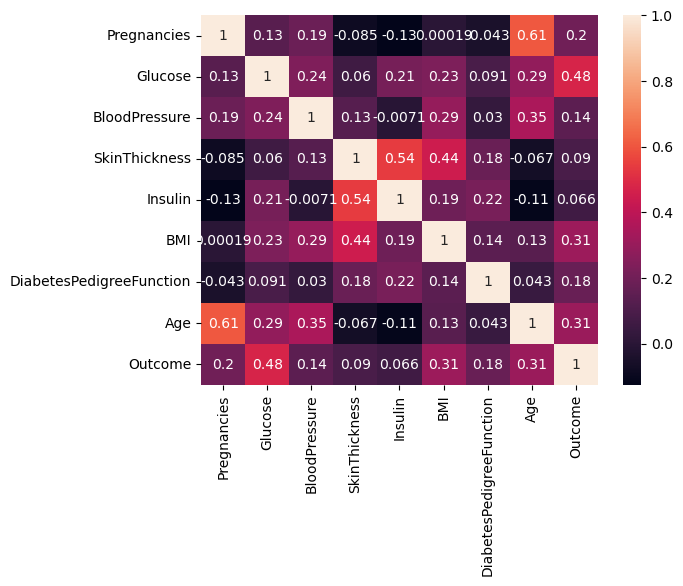

In [78]:
corr=df.corr(method='spearman')
sns.heatmap(corr, annot=True);

## Close to 1 indicates a very good relationship, Close to -1 indicates a      very poor relationship



## Observations :
##     There are outliers in the Glucose feature data.
## The Median of Glucose levels for Healthy people is ~110, whereas for      a person with Diabetes is ~145
## If Glucose levels are <=~80, no diabetes
## If Glucose levels are >80 and <125, then there is a very low           probability of having diabetes
## If Glucose levels >125 and <175, then there is a high probability of having diabetes
## If Glucose levels are >~175, then the person has diabetes